In [2]:
# Train a Linear Classifier to distinguish behavioral phenotypes in mice

In [16]:
import pandas as pd
from moseq_utils.classifier import Classifier
from moseq_utils.visualization.config import COLOR_MAPPING_MALES, MAPPING_MALES
import matplotlib as mpl
import numpy as np

In [13]:
fingerprint_df = pd.read_csv('./dataframes/fingerprint_df.csv')
fingerprint_df = fingerprint_df.drop(columns=['Unnamed: 0'])
fingerprint_df = fingerprint_df.reset_index()
fingerprint_df.to_csv('./dataframes/fingerprint_df_males.csv')


In [14]:
fingerprint_df.head()

,index,uuid,syllable_0,syllable_1,syllable_2,syllable_3,syllable_4,syllable_5,syllable_6,syllable_7,...,mean_duration_syllable_65,mean_duration_syllable_66,mean_duration_syllable_67,mean_duration_syllable_68,mean_duration_syllable_69,mean_duration_syllable_70,mean_duration_syllable_71,proportion_fast_syllables,proportion_medium_syllables,proportion_slow_syllables
0,0,0161c00a-28b3-4140-b727-43c92c96b8c3,0.008811,0.056290,0.020558,0.002937,0.001468,0.031326,0.013216,0.049437,...,305.0,165.0,0.0,0.0,0.0,0.0,0.0,0.182860,0.226663,0.590477
1,1,02d4293f-965a-44c5-a779-5ef7393388d5,0.038448,0.021436,0.036747,0.029602,0.038108,0.020415,0.015311,0.023137,...,27.0,301.0,0.0,0.0,0.0,0.0,0.0,0.281879,0.399729,0.318391
2,2,0712d9de-014d-44a1-b449-ecd1f5096fb1,0.041791,0.006633,0.053731,0.030514,0.031177,0.036484,0.035489,0.026202,...,38.0,34.0,3.0,0.0,0.0,0.0,0.0,0.483193,0.287500,0.229307
3,3,07a2010c-8c95-4ae4-80e0-b1ff90c2c567,0.039023,0.038725,0.016086,0.039917,0.039619,0.010128,0.041704,0.008937,...,0.0,438.0,161.0,0.0,0.0,0.0,0.0,0.386649,0.364801,0.248550
4,4,0901ff44-bede-4e44-9bc9-c412dbc37fcc,0.043937,0.021090,0.059754,0.015817,0.018453,0.039543,0.021090,0.027241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465180,0.298745,0.236075


In [14]:
mpl.rcParams['font.family'] = 'Arial'

fingerprint_df['group'] = fingerprint_df['group'].replace(MAPPING_MALES)

In [16]:
groups = ['White Matter Stroke (Baseline, Male)', 'White Matter Stroke (7 dpi, Male)', 'White Matter Stroke (30 dpi, Male)', 'Cortical Stroke (Baseline, Male)', 
          'Cortical Stroke (7 dpi, Male)', 'Cortical Stroke (30 dpi, Male)', 'Control (Baseline, Male)', 'Control (7 days, Male)', 
          'Control (30 days, Male)']
new_df = fingerprint_df[fingerprint_df['group'].isin(groups)]
# Let's combine the WMS Baseline and CS Baseline groups into a single group for prediction purposes
new_df['group'] = new_df['group'].replace(['White Matter Stroke (Baseline, Male)', 'White Matter Stroke (7 dpi, Male)'], 'Baseline')
#  Fill in any missing values with 0
new_df.fillna(0, inplace=True)
# Define features (X) and target (y)
# Since we only want to use MoSeq syllables here, we will drop any non-Moseq features, such as velocity, average height, and distance to center
X = new_df.drop(columns=['group','uuid', 'SubjectName', 'velocity_2d_mm', 'height_ave_mm', 'dist_to_center_px'])
y = new_df['group']

Accuracy: 0.8147
Classification Report:
                                    precision    recall  f1-score   support

                          Baseline       0.60      0.41      0.49        29
           Control (30 days, Male)       0.84      0.90      0.87        29
            Control (7 days, Male)       0.90      0.90      0.90        29
          Control (Baseline, Male)       0.93      0.93      0.93        29
    Cortical Stroke (30 dpi, Male)       0.83      0.83      0.83        29
     Cortical Stroke (7 dpi, Male)       0.83      0.83      0.83        29
  Cortical Stroke (Baseline, Male)       0.83      0.86      0.85        29
White Matter Stroke (30 dpi, Male)       0.71      0.86      0.78        29

                          accuracy                           0.81       232
                         macro avg       0.81      0.81      0.81       232
                      weighted avg       0.81      0.81      0.81       232



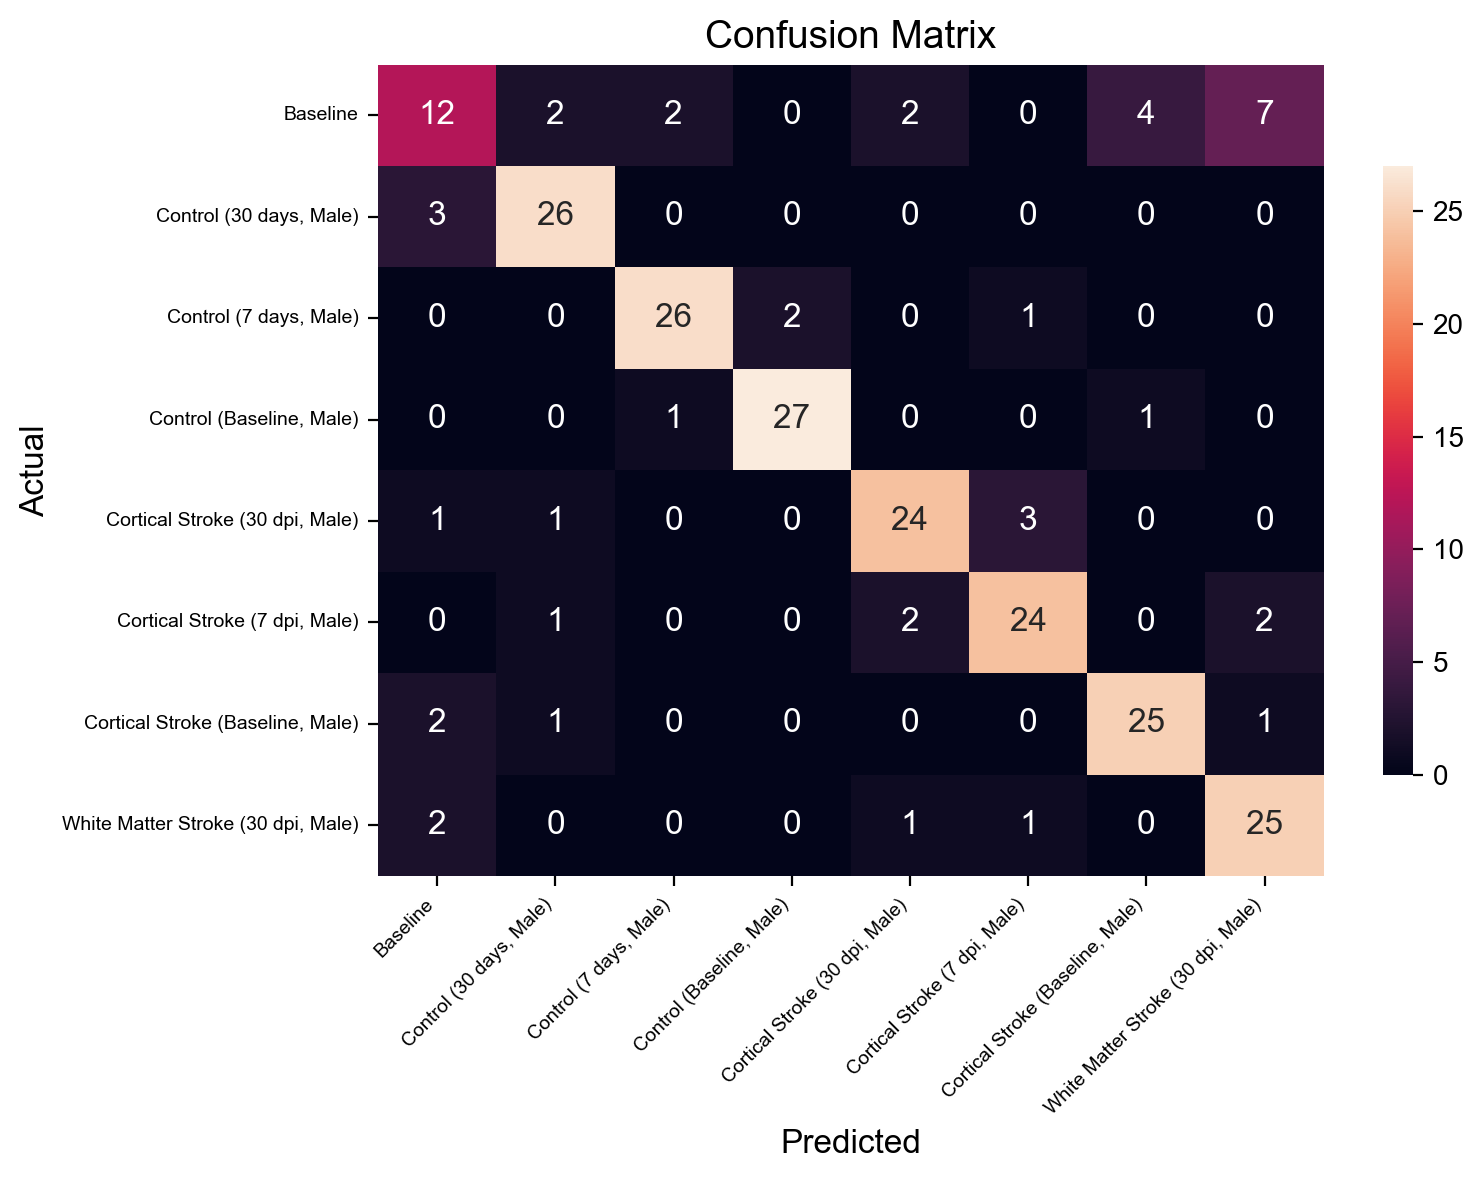

F1 Score: 0.8085
Top 10 Feature Importances:
                       Feature  Importance
57                 syllable_56    0.684266
107  mean_duration_syllable_34    0.674814
39                 syllable_38    0.623334
113  mean_duration_syllable_40    0.613717
36                 syllable_35    0.604642
54                 syllable_53    0.561994
122  mean_duration_syllable_49    0.547398
35                 syllable_34    0.546551
32                 syllable_31    0.529739
60                 syllable_59    0.465953


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


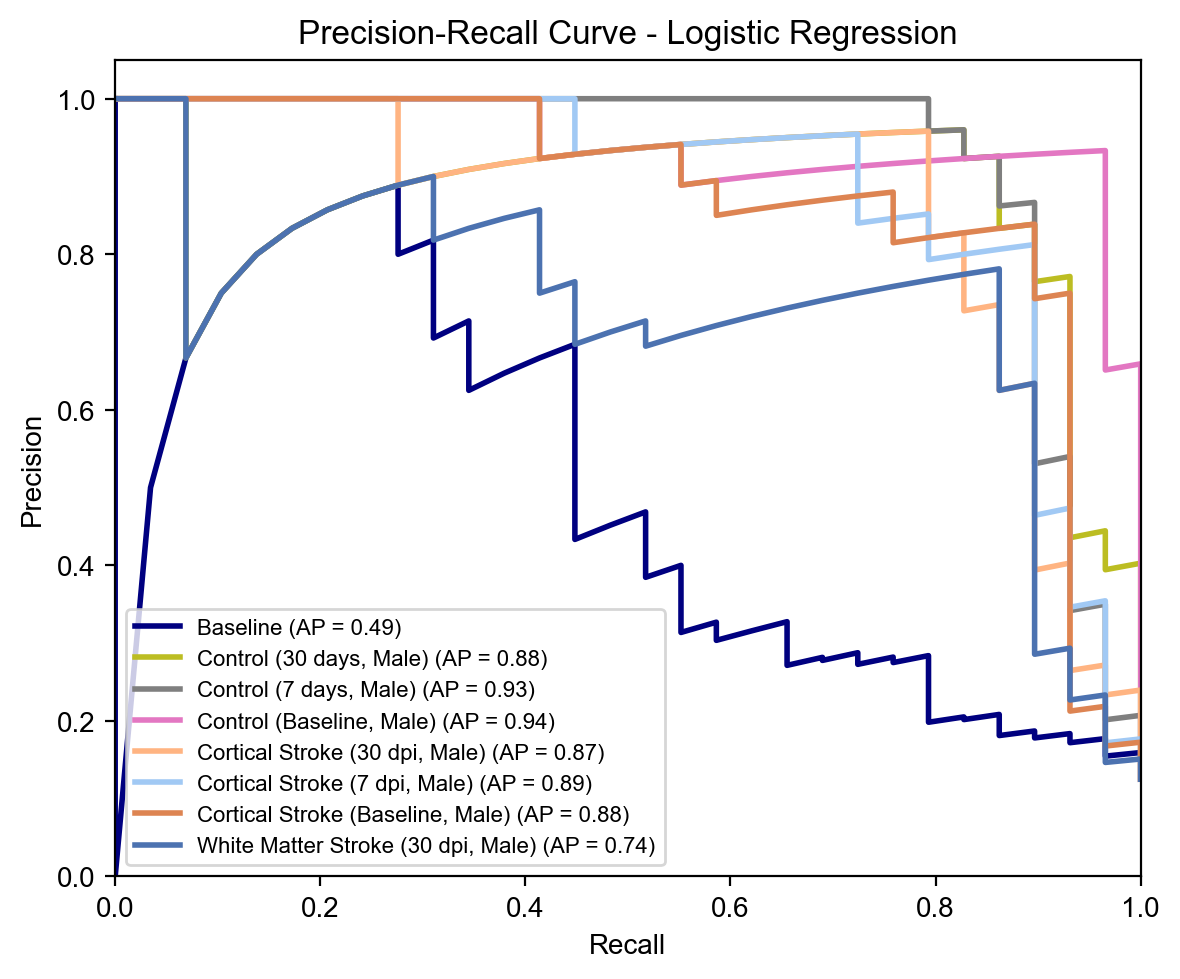

In [21]:
clf = Classifier(model_type='logistic_regression', color_mapping=COLOR_MAPPING_MALES)
y_pred, accuracy, conf_matrix, class_report, f1 = clf.train_and_evaluate(X, y)
feature_importances = clf.get_feature_importance(X, y)
clf.plot_precision_recall_curve(X, y)